# سوال ۳

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.cluster import KMeans

# 3-1

In [2]:
df = pd.read_csv("Banknote.csv",header=None,names=["variance","skewness","curtosis","entropy","class"])
df.head()
df.describe(include = 'all')

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df)
normalized = scaler.transform(df)
df= pd.DataFrame(normalized,columns=["variance","skewness","curtosis","entropy","class"])


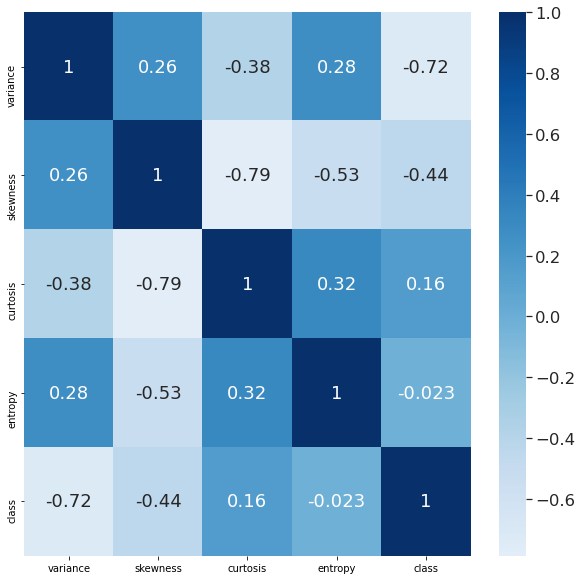

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(), center=0, cmap='Blues',annot=True)

# 3-2

In [5]:
from sklearn.cluster import KMeans
#df=df.drop(["class"],axis=1)
KM=KMeans(n_clusters=2).fit(df)
y_kmeans = KM.predict(df)

# 3-3

In [6]:
centroids = KM.cluster_centers_
centroids

array([[3.73094018e-01, 4.78191481e-01, 3.20260668e-01, 6.63916933e-01,
        1.00000000e+00],
       [6.72016529e-01, 6.74646570e-01, 2.62037951e-01, 6.72918858e-01,
        6.66133815e-16]])

# 3-4

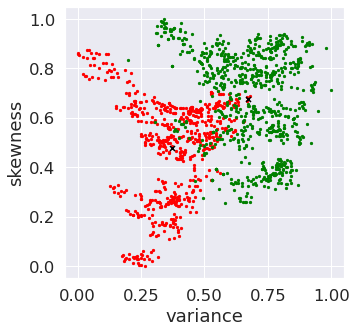

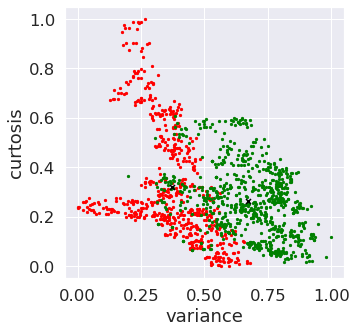

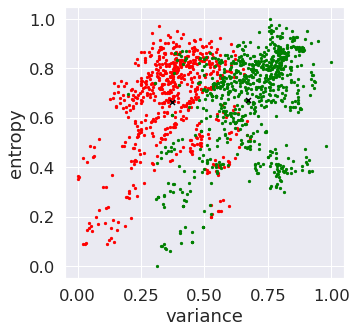

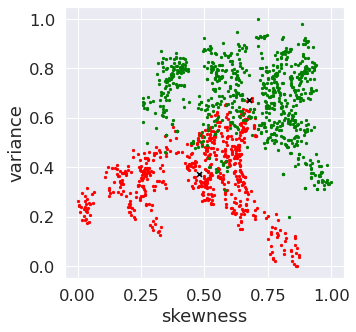

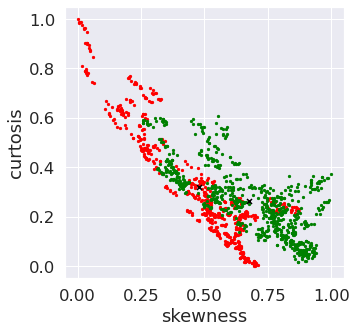

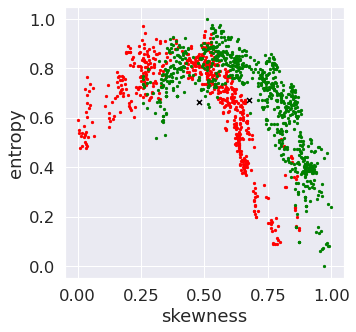

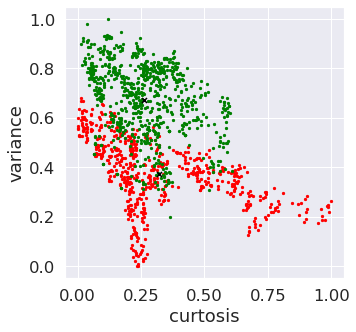

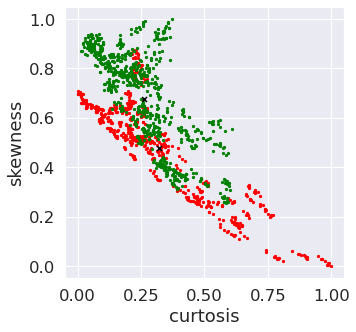

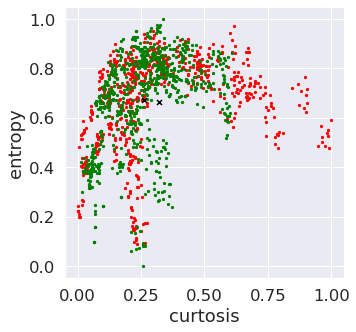

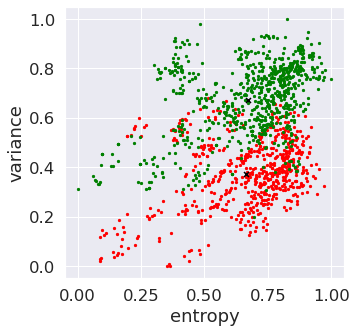

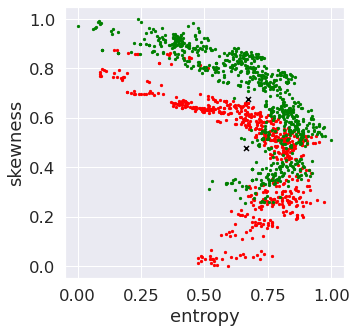

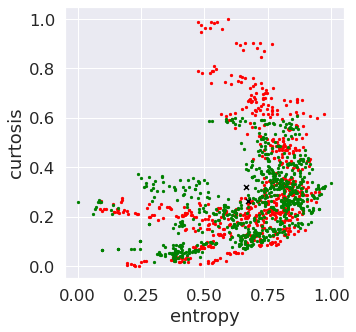

In [7]:
l=["variance","skewness","curtosis","entropy"]
for a in range(4):
    for b in range(4):
        if a !=b :
            x=df[l[a]]
            y=df[l[b]]
            x0=[]
            y0=[]
            x1=[]
            y1=[]

            for i in range(0,x.size):
                if(KM.labels_[i] == 0):
                    x0.append(x[i])
                    y0.append(y[i])
                else:
                    x1.append(x[i])
                    y1.append(y[i])


            #Plotting the values and cluster centres
            plt.figure(figsize=(5,5))
            plt.scatter(x0,y0,c="red",s=5)
            plt.scatter(x1,y1,c="green",s=5)
            plt.scatter(centroids[:,a],centroids[:,b],c="black",s=25,marker="x")
            plt.xlabel(l[a])
            plt.ylabel(l[b])

# 3-5

In [8]:
i=KM.inertia_
i

176.51602058157988

# 3-6

In [9]:
inertias=[]  
for i in range(1,6):
    k=KMeans(n_clusters=i).fit(df)
    inertias.append(k.inertia_)
    print(k.inertia_,"\t",i)

559.8299653599079 	 1
176.51602058157988 	 2
132.26375303529653 	 3
90.34823085083576 	 4
73.48305162077807 	 5


# 3-7

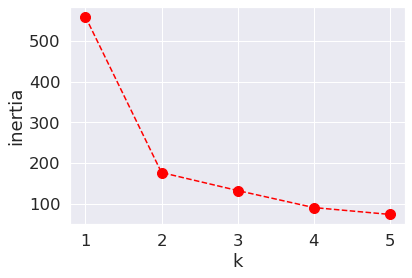

In [10]:
plt.plot(range(1, 6), inertias, color='red', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

# ساخت مدل با دو ویژگی مهم تر

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_r = pca.fit(df)
print(X_r.explained_variance_ratio_)

[0.69555915 0.18953598 0.08398447 0.02646894]


In [12]:
from sklearn.cluster import KMeans

df1=df.drop(["class","curtosis","entropy"],axis=1)
KM=KMeans(n_clusters=2).fit(df1)
y_kmeans = KM.predict(df1)

In [13]:
centroids = KM.cluster_centers_
centroids

array([[0.36856946, 0.44801668],
       [0.67363679, 0.6971674 ]])

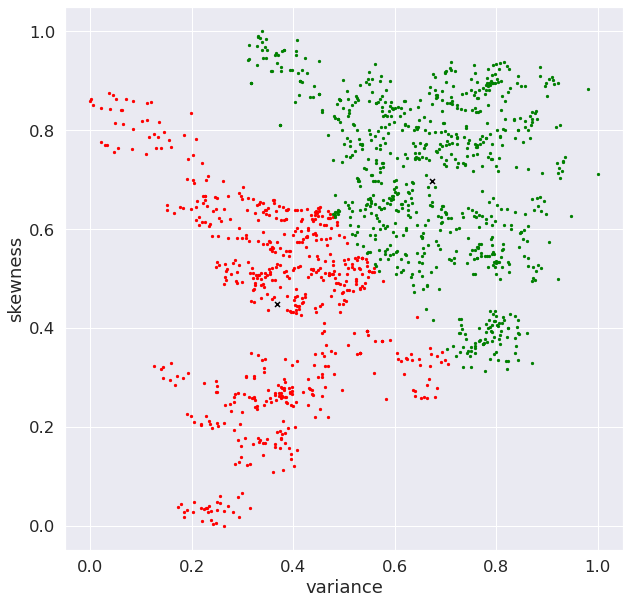

In [14]:
l=["variance","skewness"]
for a in range(1):
    for b in range(2):
        if l[a] !=l[b] :
            x=df1[l[a]]
            y=df1[l[b]]
            x0=[]
            y0=[]
            x1=[]
            y1=[]

            for i in range(0,x.size):
                if(KM.labels_[i] == 0):
                    x0.append(x[i])
                    y0.append(y[i])
                else:
                    x1.append(x[i])
                    y1.append(y[i])


            #Plotting the values and cluster centres
            plt.figure(figsize=(10,10))
            plt.scatter(x0,y0,c="red",s=5)
            plt.scatter(x1,y1,c="green",s=5)
            plt.scatter(centroids[:,a],centroids[:,b],c="black",s=25,marker="x")
            plt.xlabel(l[a])
            plt.ylabel(l[b])

In [15]:
i=KM.inertia_
i

71.26271004385801

In [16]:
inertias=[]  
for i in range(1,6):
    k=KMeans(n_clusters=i).fit(df1)
    inertias.append(k.inertia_)
    print(k.inertia_,"\t",i)

123.74036629854533 	 1
71.26171427805683 	 2
50.140087429546455 	 3
34.90196593906007 	 4
25.540099447578893 	 5


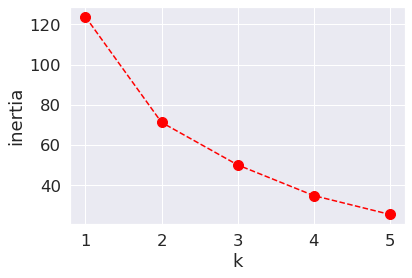

In [17]:
plt.plot(range(1, 6), inertias, color='red', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()